# MLP OPPE 2 Examination

## Que 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/v3.csv')

In [ ]:
df.head()

,Buying,Maint,Doors,Persons,Lug_boot,Safety,Evaluation
0,med,low,2,6,med,low,unacc
1,vhigh,vhigh,4,2,med,med,unacc
2,vhigh,high,3,4,big,med,unacc
3,high,low,4,6,big,med,acc
4,vhigh,vhigh,4,2,big,high,unacc


## Que 2

In [ ]:
df.isnull().sum()

Buying        7
Maint         0
Doors         0
Persons       0
Lug_boot      0
Safety        0
Evaluation    0
dtype: int64

## Que 3

In [ ]:
df['Lug_boot'].unique()

array(['med', 'big', 'small'], dtype=object)

## Que 4

In [ ]:
labels=df['Evaluation']
features=df.drop(['Evaluation'],axis=1)

In [ ]:
labels.head()

0    unacc
1    unacc
2    unacc
3      acc
4    unacc
Name: Evaluation, dtype: object

In [ ]:
labels.value_counts()

unacc    1058
acc       317
good       65
vgood      60
Name: Evaluation, dtype: int64

## Que 5

In [ ]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy='most_frequent')
X=si.fit_transform(features)
type(X)

numpy.ndarray

## Que 6

In [ ]:
features1=pd.DataFrame(X,columns=['Buying', 'Maint', 'Doors', 'Persons', 'Lug_boot', 'Safety'])
features1.isnull().sum()

Buying      0
Maint       0
Doors       0
Persons     0
Lug_boot    0
Safety      0
dtype: int64

## Que 7

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
cat=ColumnTransformer([('categorical',OneHotEncoder(sparse=False), [0,1,4,5] )])
num=ColumnTransformer([('numerical',StandardScaler(), [2,3] )])
X1=cat.fit_transform(features1)
X2=num.fit_transform(features1)
print(type(X1))
print(type(X2))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
cat_features=features1.drop(['Doors', 'Persons'],axis=1)
num_features=features1.drop(['Buying', 'Maint', 'Lug_boot', 'Safety'],axis=1)
oe=OneHotEncoder(sparse=False)
ss=StandardScaler()
X1=oe.fit_transform(cat_features)
X2=ss.fit_transform(num_features)
print(type(X1))
print(type(X2))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## Que 8

In [ ]:
X=np.concatenate((X1,X2),axis=1)
features2=pd.DataFrame(X)
features2.shape

(1500, 16)

In [ ]:
#Verified
X=np.concatenate((X1,X2),axis=1)
features2=pd.DataFrame(X)
features2.shape

(1500, 16)

## Que 9

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features2,labels,test_size=0.2,random_state=32)

In [ ]:
X_train.shape

(1200, 16)

## Que 10

In [ ]:
from sklearn.linear_model import Perceptron
p_clf=Perceptron(fit_intercept=True,max_iter=10,shuffle=False,validation_fraction=0.2,
                 warm_start=False,eta0=1,random_state=32)
p_clf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


Perceptron(eta0=1, max_iter=10, random_state=32, shuffle=False,
           validation_fraction=0.2)

In [ ]:
p_clf.coef_[1,2]

1.0

## Que 11
Apply logistic regression using SGDClassifier on the training dataset (X_train and y_train). Use the following parameters:

Apply appropriate loss value (i.e. log)

apply ridge regularization,

maximum number of passes over the training data is 10

initial learning rate is 0.01,

regularization rate value is 0.001,

learning rate should not change during training.

Take random_state=32.

Based on this operation, calculate and mark the correct value of mean accuracy computed from score(X_train,y_train) (Upto 4 decimal points) from the given set of options.

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(loss='log',penalty='l2',max_iter=10,eta0=0.01,
                  alpha=0.001,learning_rate='constant',random_state=32)
sgd.fit(X_train,y_train)
sgd.score(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


0.795

## Que 12
Use LogisticRegression with RandomizedSearchCV for fitting on the training dataset. For Logistic regression, use Saga solver, random state to be equal to 32, tolerance for stopping criteria to be 1e-2, and maximum number of iterations taken for the solvers to converge to be 200.

Penalties to be tried out are L1 and L2. Regularization strength (inverse of regularization rate) to be tried out is [0.5, 1.0, 1.5, 2.0, 2.5, 3, 3.5, 4]

Search best values of C and penalty and mark the correct option from the following statements. For randomizedsearchCV also, take random state = 32

In [ ]:
from re import S
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(solver='saga',max_iter=200,tol=1e-2,random_state=32)
distributions = dict(C=[0.5, 1.0, 1.5, 2.0, 2.5, 3, 3.5, 4],penalty=['l1', 'l2'])
log_randcv=RandomizedSearchCV(log,
                              param_distributions=distributions,
                              random_state=32
                              )
log_randcv.fit(X_train,y_train)
log_randcv.best_params_

{'C': 1.5, 'penalty': 'l1'}

In [ ]:
log_randcv.cv_results_

{'mean_fit_time': array([0.03003993, 0.02764082, 0.01987648, 0.02773271, 0.04637403,
        0.0113287 , 0.02389498, 0.01454277, 0.01663146, 0.01123776]),
 'mean_score_time': array([0.00347953, 0.0036953 , 0.00344653, 0.00334496, 0.0032402 ,
        0.00230093, 0.00244765, 0.00260921, 0.00234256, 0.00194244]),
 'mean_test_score': array([0.84      , 0.84916667, 0.84833333, 0.84916667, 0.85      ,
        0.83916667, 0.84666667, 0.85      , 0.85      , 0.8475    ]),
 'param_C': masked_array(data=[0.5, 3.5, 2.5, 4, 1.5, 0.5, 1.0, 3.5, 3, 4],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=['l1', 'l1', 'l2', 'l1', 'l1', 'l2', 'l1', 'l2', 'l1',
                    'l2'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': 

There are three parameters with score of 0.85, initial one is shown in `best_params_`. The other parameters are `{'C':3.0,'penalty:'l1'}` and `{'C':3.5,'penalty:'l2'}` 

KeyError: ignored

## Que 13

6 points
Apply GridsearchCV and support vector classifier (SVC)(kernel':('linear', 'rbf'), 'C':[1, 10]) on the training dataset X_train, y_train and calculate the best value of C and kernel.

'use random_state = 32 for SVC'

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc=SVC(random_state=32)
param_grid={'kernel':['linear','rbf'],
            'C':[1,10]}
svc_grid=GridSearchCV(svc,
                      param_grid
                    )
svc_grid.fit(X_train,y_train)
svc_grid.best_params_

{'C': 10, 'kernel': 'rbf'}

## Que 14
Use grid search with cross validation (GridSearchCV) on training set with KNeighborsClassifier as the estimator, 'accuracy' as scoring parameter, cv value as 4 and consider [1,3,5,7] as "number of neighbors" to be examined.

Consider following parameters for KNeighborsClassifier:

Take metric as 'minkowski',

Set P value as 2

keep other parameter value as default value.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier(metric='minkowski',p=2)
param_grid={'n_neighbors':[1,3,5,7]}
knc_grid=GridSearchCV(knc,
                      param_grid,
                      cv=4,
                      scoring='accuracy',
                      return_train_score=True)
knc_grid.fit(X_train,y_train)
knc_grid.best_params_

{'n_neighbors': 3}

## Que 15

In [ ]:
knc_grid.best_estimator_.score(X_train,y_train)

{'mean_fit_time': array([0.00470811, 0.00438076, 0.00436187, 0.00444937]),
 'mean_score_time': array([0.02219194, 0.02058333, 0.02185029, 0.0240162 ]),
 'mean_test_score': array([0.885     , 0.90916667, 0.8975    , 0.89833333]),
 'mean_train_score': array([0.99944444, 0.97055556, 0.95527778, 0.95138889]),
 'param_n_neighbors': masked_array(data=[1, 3, 5, 7],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 3},
  {'n_neighbors': 5},
  {'n_neighbors': 7}],
 'rank_test_score': array([4, 1, 3, 2], dtype=int32),
 'split0_test_score': array([0.89666667, 0.93666667, 0.91333333, 0.90333333]),
 'split0_train_score': array([1.        , 0.96777778, 0.95      , 0.94888889]),
 'split1_test_score': array([0.89333333, 0.9       , 0.91      , 0.91      ]),
 'split1_train_score': array([0.99888889, 0.96333333, 0.95666667, 0.95111111]),
 'split2_test_score': array([0.88666667, 0.89333333, 0.89      , 0.

In [ ]:
knc_grid.best_estimator_.score(X_train,y_train)

0.9783333333333334

## Que 16
Train the model using Decision Tree Classifier on training set. Set following parameters:

Take criterion as 'gini',

Set strategy to choose the split at each node as 'random',

minimum number of samples required to split an internal node = 5,

min_impurity_decrease = 0.001,

Use random_state = 32

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='gini',splitter='random',
                           min_samples_split=5,min_impurity_decrease=0.001,random_state=32)
dtc.fit(X_train,y_train)
dtc.score(X_train,y_train)

0.975

## Que 17

In [ ]:
dtc.get_depth()

11

## Que 18
Visualize this tree model. What is the value of gini impurity at the right child of root?


In [ ]:
from sklearn import tree
?tree.plot_tree

[Text(0.4, 0.875, 'X[15] <= -0.274\ngini = 0.44\nsamples = 1200\nvalue = [243, 48, 862, 47]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 418\nvalue = [0, 0, 418, 0]'),
 Text(0.6, 0.625, 'X[12] <= 0.835\ngini = 0.574\nsamples = 782\nvalue = [243, 48, 444, 47]'),
 Text(0.4, 0.375, 'X[3] <= 0.879\ngini = 0.642\nsamples = 514\nvalue = [243, 48, 176, 47]'),
 Text(0.2, 0.125, '\n  (...)  \n'),
 Text(0.6, 0.125, '\n  (...)  \n'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 268\nvalue = [0, 0, 268, 0]')]

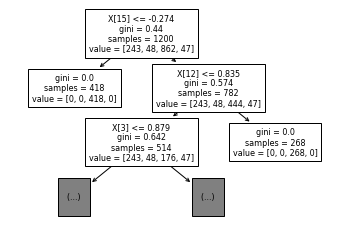

In [ ]:
tree.plot_tree(dtc,max_depth=2,fontsize=8)

## Que 19
Take RandomForestClassifier (random state to be 32) with GridSearchCV to tune the number of decision trees with training set. The number of trees in forest can range from 10 to 15 (both inclusive). Mark the number of decision trees that will produce the best score on the training data.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=32)
param_grid={'n_estimators':list(range(10,16))}
rfc_grid=GridSearchCV(rfc,
                      param_grid)
rfc_grid.fit(X_train,y_train)
rfc_grid.best_params_

{'n_estimators': 12}

## Que 20
Train a separate BaggingClassifier on training set with each one of the following as base estimator: support vector classifier (SVC), LogisticRegression, KNeighborsClassifier and DecisionTreeClassifier. Measure accuracy score on test set with each of these bagging classifiers. Which base estimator yields the highest accuracy score on test data?

Take random_state as 32 and n_estimators value as 15 for BaggingClassifier with each base estimator.
Take random_state as 32 individually for each of the following: support vector classifier(SVC), DecisionTreeClassifier and LogisticRegression

In [ ]:
from sklearn.ensemble import BaggingClassifier
bg_svm=BaggingClassifier(base_estimator=SVC(random_state=32),
                         n_estimators=15,
                         random_state=32)
bg_svm.fit(X_train,y_train)
bg_svm.score(X_test,y_test)

0.98

In [ ]:
bg_dtc=BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=32),
                         n_estimators=15,
                         random_state=32)
bg_dtc.fit(X_train,y_train)
bg_dtc.score(X_test,y_test)

0.9733333333333334

In [ ]:
bg_log=BaggingClassifier(base_estimator=LogisticRegression(random_state=32),
                         n_estimators=15,
                         random_state=32)
bg_log.fit(X_train,y_train)
bg_log.score(X_test,y_test)

0.8166666666666667

In [ ]:
bg_knc=BaggingClassifier(base_estimator=KNeighborsClassifier(),
                         n_estimators=15,
                         random_state=32)
bg_knc.fit(X_train,y_train)
bg_knc.score(X_test,y_test)

0.93